## T-test 

In [ ]:
# Import the packages
import numpy as np
import statistics
from scipy import stats

In [ ]:
# Define 2 random distributions # Sample Size
N = 7

a = (17, 20, 25, 18, 31, 19, 35)
b = (26, 18, 32, 25, 21, 20, 40)

In [ ]:
# Calculate the Standard Deviation
# Calculate the variance to get the standard deviation
# For unbiased max likelihood estimate we have to divide the var by N - 1
var_a = statistics.variance(a)
var_b = statistics.variance(b)

In [ ]:
# std deviation
s = np.sqrt((var_a + var_b)/2)

In [ ]:
# Calculate the t-statistics
# t = (a.mean() - b.mean())/(s * np.sqrt(2/N))
t = (statistics.mean(a) - statistics.mean(b))/(s * np.sqrt(2/N))

In [ ]:
# Compare with the critical value
# Degrees of freedom
df = (2 * N) - 2

In [ ]:
# p-value after comparison with t
p = 1 - stats.t.cdf(t, df = df)

print("t = " + str(t))
print("p = " + str(2 * p))

In [ ]:
# You can see that after comparing the t-statistic with the critical t-value (computed internally)
# Cross checking with the internal scipy function
t2, p2 = stats.ttest_ind(a, b)
print("t = " + str(t2))
print("p = " + str(p2))

## Q-Q Plot

In [ ]:
import numpy as np
import pylab
import statsmodels.api as sm

In [ ]:
a = (17, 20, 25, 18, 31, 19, 35)
b = (26, 18, 32, 25, 21, 20, 40)

In [ ]:
stats.probplot(a, dist = "norm", plot = pylab)
pylab.show()

stats.probplot(b, dist = "norm", plot = pylab)
pylab.show()

## Density Plot

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a = (17, 20, 25, 18, 31, 19, 35)
b = (26, 18, 32, 25, 21, 20, 40)

In [ ]:
# seaborn histogram
sns.distplot(a, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, color = 'blue',
             hist_kws = {'edgecolor': 'black'})

# Add labels
plt.title('Density Plot of a, b')
plt.xlabel('Range of Values')
plt.ylabel('Frequency')

# seaborn histogram
sns.distplot(b, hist = False, kde = True,
             kde_kws = {'linewidth': 3}, color = 'red',
             hist_kws = {'edgecolor': 'black'})

## ANOVA

In [ ]:
from scipy.stats import f_oneway

In [ ]:
tillamook = [0.0571,0.0813,0.0831,0.0976,0.0817,0.0859,0.0735,0.0659,0.0923,0.0836]
newport = [0.0873,0.0662,0.0672,0.0819,0.0749,0.0649,0.0835,0.0725]
petersburg = [0.0974,0.1352,0.0817,0.1016,0.0968,0.1064,0.105]
magadan = [0.1033,0.0915,0.0781,0.0685,0.0677,0.0697,0.0764,0.0689]
tvarminne = [0.0703,0.1026,0.0956,0.0973,0.1039,0.1045]

f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

## ANOVA 2

In [ ]:
import pandas as pd

In [2]:
# load data 
# A = [25, 30, 28, 36, 29]
# B = [45, 55, 29, 56, 40]
# C = [30, 29, 33, 37, 27]
# D = [54, 60, 51, 62, 73]

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [3]:
# reshape the dataframe suitable for statsmodel package
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [4]:
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [5]:
# Generate a boxplot to see the data distribution by treatments.  
# Using boxplot, we can easily detect the differences between treatments
import matplotlib.pyplot as plt
import seaborn as sns

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


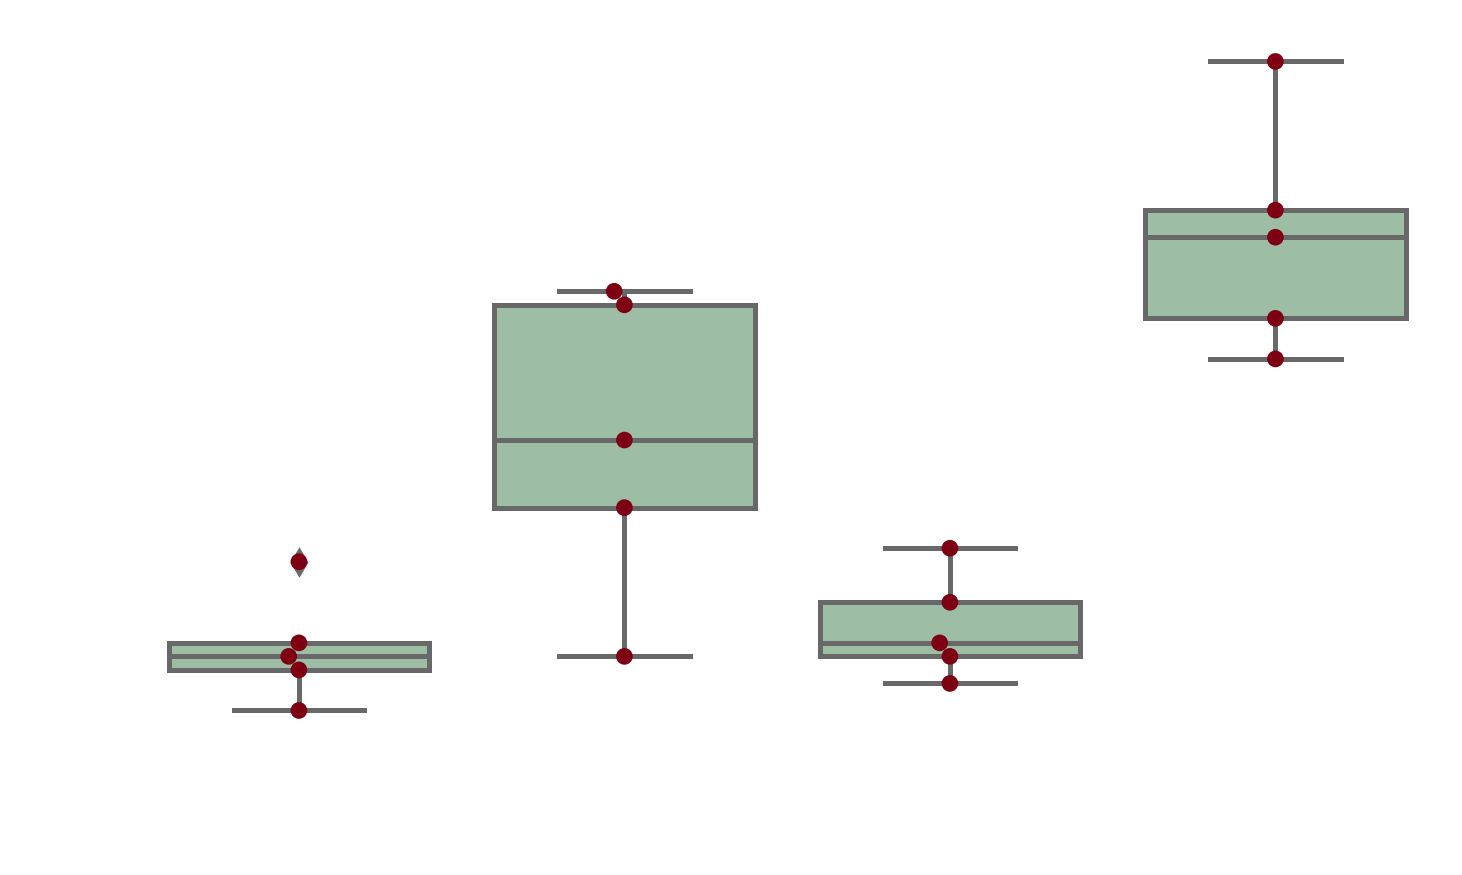

In [6]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='treatments', y='value', data=df_melt, color='#7d0013')
plt.show()

In [7]:
import scipy.stats as stats

In [8]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [9]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [14]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
!pip install bioinfokit
from bioinfokit.analys import stat

In [15]:
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


## ANOVA Qualifications for Platoons

In [16]:
# Import the packages
import numpy as np
import statistics
from scipy.stats import f_oneway

In [18]:
# Targets scored out of 40 rounds for Qualification Test
# Null hypothesis: Groups means are equal (no variation in means of groups)
# HO: mu1=mu2=...=mup
# Alternative hypothesis: At least one group mean is different from the other groups
# H1: ALl mu are not equal

alpha = (17,20,25,18,31,19,35)
bravo = (36,38,32,35,36,39,40)
charlie = (34,37,27,18,39,40,33)
delta = (30,31,34,18,22,27)
echo = (31,22,26,22,27,30,35)

In [19]:
f_oneway(alpha, bravo, charlie, delta, echo)

F_onewayResult(statistic=5.163331793738248, pvalue=0.00288771527030502)